In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import cv2
import matplotlib.pyplot as plt
from pytorchyolo import detect, models
import os
import matplotlib.patches as patches
import modules.utils as utils
import inference.YOLO as YOLO

##### Specify the cfg file and weights file for YOLO (could be v3, v4, v3-tiny, v4-tiny, .....)

In [14]:
cfg = "/project/trinity/pretrained_models/yolo/yolov3-tiny/yolov3-tiny.cfg"
weights = "/project/trinity/pretrained_models/yolo/yolov3-tiny/yolov3-tiny.weights"

##### Load the YOLO Object

In [15]:
yolo = YOLO.YOLOModel(cfg, weights)

----------------------------------------------------------------------

### YOLO on given images (any kind of jpg, png images)

#### Give the folder path containing the images

Benign Images

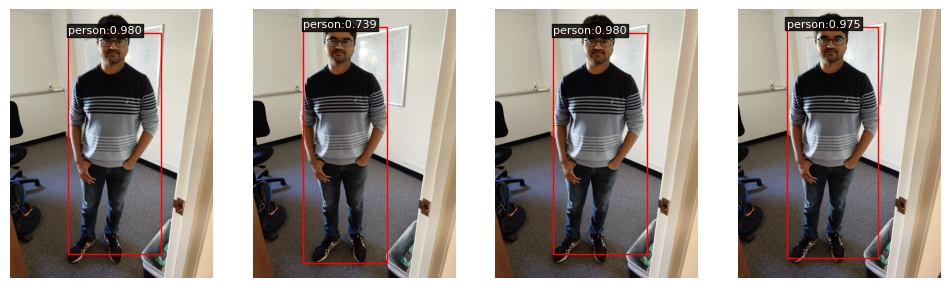

In [17]:
folder = "/project/trinity/datasets/PhysicalAttacks/Person/Benign/"

# Use utils.LoadImages for loading the images (that are already in .jpg, .png formats in the folder)
batch_imgs = utils.LoadImages(folder, batchsize=4, scale=0.25)

for imgs_list in batch_imgs:
    # print(len(imgs_list))p
    _, _, _ = yolo.inference(imgs_list)
    yolo.visualize(scoreThreshold = 0.5, numCols=4)

Adversarial Images

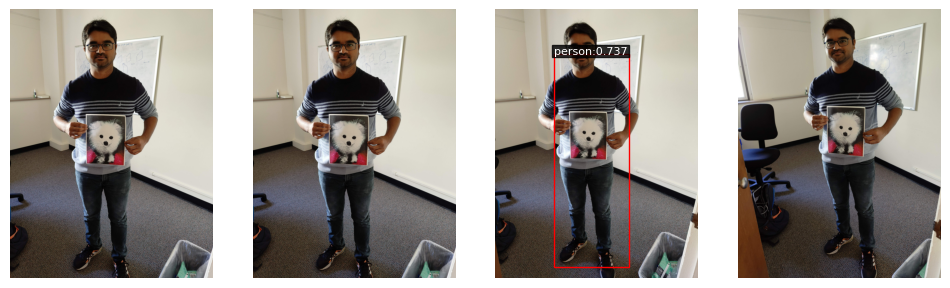

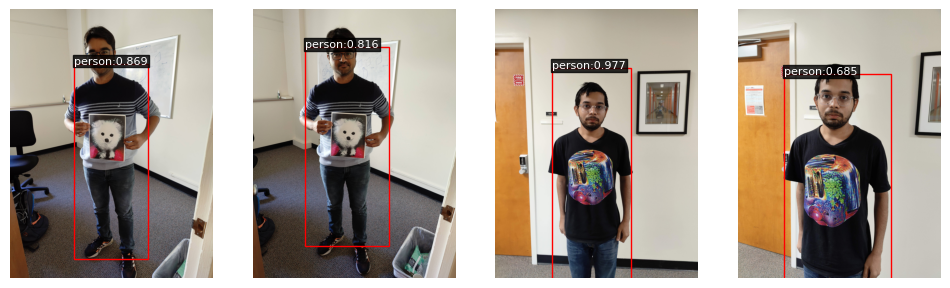

In [18]:
folder = "/project/trinity/datasets/PhysicalAttacks/Person/Adversarial"
batch_imgs = utils.LoadImages(folder, batchsize=4, scale=0.25, numImages=8)

for imgs_list in batch_imgs:
    # print(len(imgs_list))
    _, _, _ = yolo.inference(imgs_list)
    yolo.visualize(scoreThreshold = 0.3, numCols=4)

---------------------------------------------------

### YOLO on Apricot Dataset

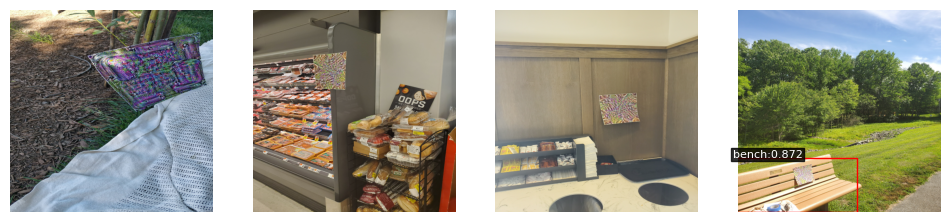

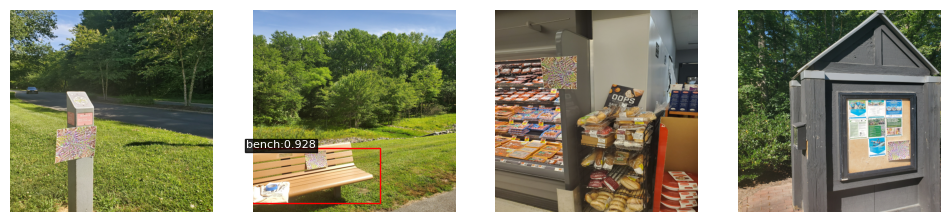

In [22]:
# Use utils.LoadApricotDataset for loading the apricot images
batch_data = utils.LoadApricotDataset(datasetPath="/project/trinity/datasets/apricot/pub/apricot-mask/dev/data_mask_v2/", batchsize=4, numImages=8, shape=(512,512))

for imgs_list, img_masks in batch_data:
    _, _, _ = yolo.inference(imgs_list)
    yolo.visualize(scoreThreshold = 0.3, numCols=4)